# Text mining

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

**Text mining, also referred to as _text data mining_, similar to text analytics, is the process of deriving high-quality [information](https://en.wikipedia.org/wiki/Information "Information") from [text](https://en.wikipedia.org/wiki/Plain_text "Plain text"). It involves "the discovery by computer of new, previously unknown information, by automatically extracting information from different written resources." Written resources may include [websites](https://en.wikipedia.org/wiki/Website "Website"), [books](https://en.wikipedia.org/wiki/Book "Book"), [emails](https://en.wikipedia.org/wiki/Email "Email"), [reviews](https://en.wikipedia.org/wiki/Review "Review"), and articles. High-quality information is typically obtained by devising patterns and trends by means such as [statistical pattern learning](https://en.wikipedia.org/wiki/Pattern_recognition "Pattern recognition").**

![image](https://noduslabs.com/wp-content/uploads/2011/12/figure-5-meaning-circulation-510x487.png)

In [2]:
import spacy
import scattertext
import pandas as pd

### Scattertext

**Scattertext is  "_a Python package that lets you interactively visualize how two categories of text are different from each other_."**

In [3]:
df = pd.read_excel('data\google_play_apps_review(en).xlsx')

df['score'] = df['score'].replace(
               {0:'Negative Sentiment', 1:'Positive Sentiment'})
df

,content,len,review,appId,lang,score
0,i have some recommendations to make for youtub...,1773,4,com.google.android.youtube,en,Positive Sentiment
1,this app makes it so very much easier to check...,1696,5,com.facebook.katana,en,Positive Sentiment
2,havent really used it much yet as im on holida...,1245,4,com.tinder,en,Positive Sentiment
3,i was tempted to give tinder a one star review...,1050,5,com.tinder,en,Positive Sentiment
4,hard times are here even for tinder first time...,811,4,com.tinder,en,Positive Sentiment
...,...,...,...,...,...,...
19995,each update ruins the platform more ever since...,242,1,com.google.android.youtube,en,Negative Sentiment
19996,theres a issue where when a video goes to an a...,242,2,com.google.android.youtube,en,Negative Sentiment
19997,new update is terrible putting it into full sc...,242,2,com.google.android.youtube,en,Negative Sentiment
19998,annoyingly laggy and frequently freeze when i ...,242,2,com.google.android.youtube,en,Negative Sentiment


**Let's us use only the top `1000` lengthiest reviews (for both classes = [`Negative`, `Positive`]) to speed up our analysis.**

In [4]:
df_1 = df[df['score'] == 'Negative Sentiment']
df_1 = df_1.sort_values(by='content', key=lambda x: x.str.len(), ascending = False)
df_2 = df[df['score'] == 'Positive Sentiment']
df_2 = df_2.sort_values(by='content', key=lambda x: x.str.len(), ascending = False)

df_p = df_1.head(1000)
df_n = df_2.head(1000)

frames = [df_p, df_n]
df_google_play = pd.concat(frames)
df_google_play

,content,len,review,appId,lang,score
10000,ive used tinder on and off for several years a...,2104,2,com.tinder,en,Negative Sentiment
10001,this app is only about 20 reliable at least in...,1724,2,com.ubercab.eats,en,Negative Sentiment
10002,if something does not satisfy or meet my expec...,1407,2,com.ubercab.eats,en,Negative Sentiment
10003,man this app and service have gone downhill fa...,1318,2,com.ubercab.eats,en,Negative Sentiment
10004,service is good when its working well but the ...,1172,2,com.ubercab.eats,en,Negative Sentiment
...,...,...,...,...,...,...
990,overall good youve got to make some improveme...,457,4,com.tinder,en,Positive Sentiment
989,instagram can be a good place but there are pr...,457,5,com.instagram.android,en,Positive Sentiment
988,wth is wrong with this i had been not able to ...,457,4,com.instagram.android,en,Positive Sentiment
986,features should be added 1 seach option in cha...,457,4,com.instagram.android,en,Positive Sentiment


In [4]:
nlp = spacy.load('en_core_web_sm')

with open('data\stopwords_en.txt', 'r') as fp:
    str_f = fp.read()
    set_stopwords = set(str_f.split('\n'))
    fp.close()
    
nlp.Defaults.stop_words |= set_stopwords

corpus = (scattertext.CorpusFromPandas(df_google_play,
                                        category_col='score', 
                                        text_col='content',
                                        nlp=nlp)
            .build()
            .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
            )


corpus_dataframe = df_google_play
html = scattertext.produce_scattertext_explorer(
                   corpus,
                   category='Positive Sentiment',
                   category_name='Positive Sentiment',
                   not_category_name='Negative Sentiment',
                   width_in_pixels=1000,
                   metadata=corpus_dataframe['appId'])

html_file_name = "Scattertext_plot.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))
from IPython.display import display, HTML
display(HTML("<a href='Scattertext_plot.html' target='_blank'>Scattertext_plot.html</a>"))

### Textnets: text analysis with networks

**Textnets  represents collections of texts as networks of documents and words. They provide novel possibilities for the visualization and analysis of texts.**

**The ideas underlying  textnets  are presented in this paper:**

> Christopher A. Bail, “[Combining natural language processing and network analysis to examine how advocacy organizations stimulate conversation on social media](https://doi.org/10.1073/pnas.1607151113),”  _Proceedings of the National Academy of Sciences of the United States of America_  113, no. 42 (2016), 11823–11828, doi:10.1073/pnas.1607151113.

**Textnets builds on [spaCy](https://spacy.io/), a state-of-the-art library for natural-language processing, and [igraph](http://igraph.org/python/) for network analysis. It uses the [Leiden algorithm](https://doi.org/10.1038/s41598-019-41695-z) for community detection, which is able to perform community detection on the bipartite (word–group) network.**

In [6]:
import textnets as tn
from textnets import Corpus
import unidecode
import string
tn.params['seed'] = 666 # To ensure that the results are reproducible

In [7]:
df_google_play['review'] = df_google_play['review'].replace(
               {1:'Very Low Review', 2:'Low Review',
               4:'High Review', 5:'Very High Review'})



net_size = 1 # controls the size of the created network
df_VL = df_google_play[df_google_play['review'] == 'Very Low Review'].head(net_size)
df_L = df_google_play[df_google_play['review'] == 'Low Review'].head(net_size)
df_VH = df_google_play[df_google_play['review'] == 'Very High Review'].head(net_size)
df_H = df_google_play[df_google_play['review'] == 'High Review'].head(net_size)

frames = [df_VL, df_L, df_H, df_VH]
dff = pd.concat(frames)
dff = dff.set_index('review')

**Isolated nodes are the result of a given term being found exactly `once in all evaluated reviwes`, which brings its `tf-idf` score `0`.**


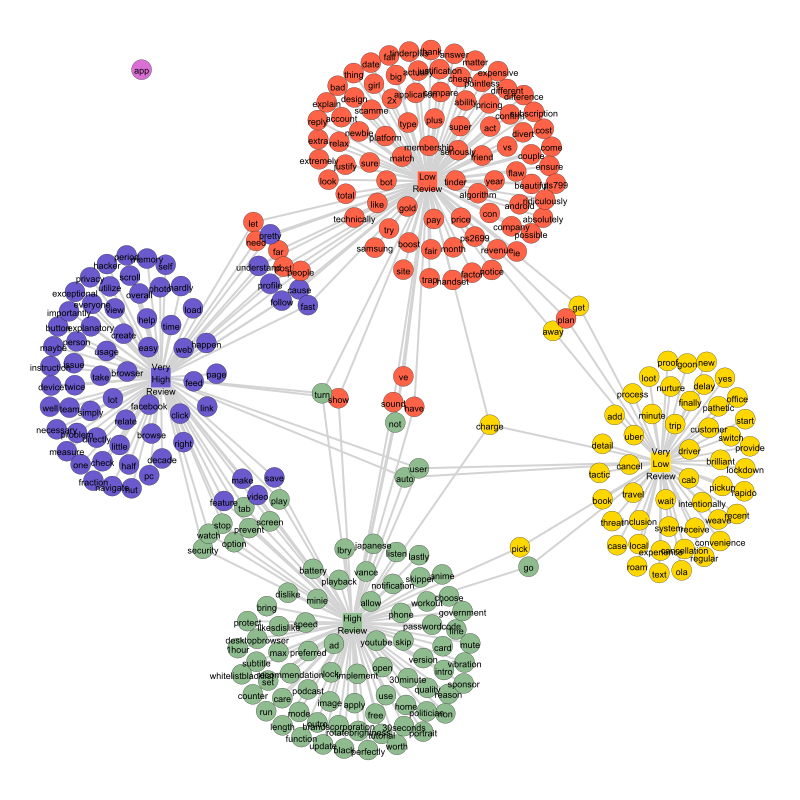

In [8]:
corpus = Corpus(dff['content'])

t = tn.Textnet(corpus.tokenized(), min_docs=1)

t.plot(label_nodes=True,
        alpha=0.5,
        color_clusters=True,
        bbox=(800, 800))

**Univariate visualization**

- *Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable.*

In [18]:
import plotly.graph_objects as go
import plotly.express as px
from textblob import TextBlob

df = pd.read_excel(r'data\google_play_apps_review(en).xlsx')
df['Review_word_count'] = df['content'].apply(lambda x: len(str(x).split()))

fig = px.histogram(df, x='len',
                   title='Histograma Review Length',
                   opacity=0.8,
                   )
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )                   
fig.show()


fig = px.histogram(df, x='Review_word_count',
                   title='Histogram Review Word count',
                   opacity=0.8,
                   )
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )                   
fig.show()
df2 = df.loc[df['Review_word_count'].idxmax()] 
print('Review with largest word count: \n')
print(df2['content'])
df3 = df.loc[df['Review_word_count'].idxmin()] 
print('\nReview with lowest word count: \n')
print(df3['content'])

Review with largest word count: 

ive used tinder on and off for several years and ive noticed the following 1  its gotten ridiculously expensive over the years ive just paid ps2699 per month for a gold membership on 1 month plan my friend too has gold membership and he only pays ps799 how can this cost be justified we are both on android platform and same handset type samsung can someone at tinder please explain how this is possible and is this really fair conning people like this 2  the algorithm absolutely designed to ensure you have several matches in the first couple days of paying for a subscription and then after that you pretty much get no matches or bots matches any justification for this why not relax the algorithms and let people actually get matches by those who they like 3  i understand you are trying to make as much revenue as you can for the company but seriously having 2 types of membership ie tinder plus and tinder gold is seriously extremely pointless if tinderplus is

**`N-gram analysis`**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

with open('Data\stopwords_en.txt', encoding='utf8') as fp:
    stopwords = [line.strip() for line in fp]
    fp.close()

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['content'], 20)
for word, freq in common_words:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_words, columns = ['Review_word' , 'count'])

fig = px.bar(df2, x='Review_word', y='count',
            title='Top-20 words (unigrams) in Reviews',
            color='count')
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )   
fig.show()

app: 16088
but: 11772
its: 8709
or: 6455
just: 5562
as: 5027
no: 4731
time: 4727
can: 4504
dont: 4413
up: 4139
an: 4069
even: 4029
your: 4012
cant: 3795
now: 3729
uber: 3655
use: 3652
video: 3628
one: 3621


**`Bigrams`**

In [16]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigrams(df['content'], 20)
for word, freq in common_bigrams:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_bigrams, columns = ['Review_word' , 'count'])

fig = px.bar(df2, x='Review_word', y='count',
            title='Top-20 bigramas in Reviews',
            color='count')
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )   
fig.show()

please fix: 882
app but: 826
uber eats: 763
more than: 535
every time: 533
as well: 504
good app: 498
but its: 488
app has: 481
but now: 474
use app: 450
social media: 399
even though: 395
cant even: 386
easy use: 380
using app: 370
love app: 370
too many: 363
other than: 359
its just: 354


**`Trigrams`**

In [17]:
def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_trigrams = get_top_n_trigrams(df['content'], 20)
for word, freq in common_trigrams:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_trigrams, columns = ['Review_word' , 'count'])

fig = px.bar(df2, x='Review_word', y='count',
            title='Top-20 trigramas em Reviews',
            color='count')
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )   
fig.show()

as soon as: 256
as well as: 151
soon as possible: 145
its good app: 120
good app but: 102
no matter how: 92
social media app: 87
love app but: 86
too many ads: 85
but now its: 82
can no longer: 74
app easy use: 74
how many times: 72
as long as: 72
please fix problem: 72
please fix issue: 69
app good but: 68
no matter what: 66
but other than: 64
over an hour: 60


---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).